In [1]:
import pandas as pd
file_path = '/Users/zhiranbai/Downloads/补充混合+板换水流量.xlsx'  # Update this to your Excel file's path
df = pd.read_excel(file_path)

In [2]:
import pandas as pd

# Assuming df is your DataFrame

# Filter DataFrame for '混合模式' and non-null in both '冷冻水流量' and '冷却水流量'
filtered_df = df[
    (df['运行模式'] == '冷机模式') &
    df['冷冻水流量'].notna() &
    df['冷却水流量'].notna() &
    df['冷冻水泵频率'].notna() &
    df['冷冻水泵功率'].notna() &
    df['冷却水泵频率'].notna() &
    df['冷却水泵功率'].notna()
]

# Initialize a dictionary to hold our results
results = {}

for _, row in filtered_df.iterrows():
    system_id = row['System Identifier']
    
    # Check if the system_id is not already in our results dictionary
    if system_id not in results:
        results[system_id] = {'X': [], 'Y': []}
    
    # Append the relevant values for X and Y
    results[system_id]['X'].append({
        '冷冻水泵频率': row['冷冻水泵频率'],
        '冷冻水泵功率': row['冷冻水泵功率'],
        '冷却水泵频率': row['冷却水泵频率'],
        '冷却水泵功率': row['冷却水泵功率'],
    })
    results[system_id]['Y'].append({
        '冷冻水流量': row['冷冻水流量'],
        '冷却水流量': row['冷却水流量'],
    })

# Now, `results` contains the X and Y values for each system identifier that meets your conditions.


In [3]:
results['3#系统']

{'X': [{'冷冻水泵频率': 35.5, '冷冻水泵功率': 54.3, '冷却水泵频率': 48.7, '冷却水泵功率': 114.6},
  {'冷冻水泵频率': 35.5, '冷冻水泵功率': 54.3, '冷却水泵频率': 48.7, '冷却水泵功率': 114.6},
  {'冷冻水泵频率': 35.5, '冷冻水泵功率': 54.3, '冷却水泵频率': 48.7, '冷却水泵功率': 114.6},
  {'冷冻水泵频率': 35.5, '冷冻水泵功率': 54.3, '冷却水泵频率': 48.7, '冷却水泵功率': 114.6},
  {'冷冻水泵频率': 35.5, '冷冻水泵功率': 54.3, '冷却水泵频率': 48.7, '冷却水泵功率': 114.6},
  {'冷冻水泵频率': 35.5, '冷冻水泵功率': 54.3, '冷却水泵频率': 48.7, '冷却水泵功率': 114.6},
  {'冷冻水泵频率': 35.5, '冷冻水泵功率': 54.3, '冷却水泵频率': 48.7, '冷却水泵功率': 114.6},
  {'冷冻水泵频率': 35.5, '冷冻水泵功率': 54.3, '冷却水泵频率': 48.7, '冷却水泵功率': 114.6},
  {'冷冻水泵频率': 35.5, '冷冻水泵功率': 54.3, '冷却水泵频率': 48.7, '冷却水泵功率': 114.6},
  {'冷冻水泵频率': 35.5, '冷冻水泵功率': 54.3, '冷却水泵频率': 48.7, '冷却水泵功率': 114.6},
  {'冷冻水泵频率': 35.5, '冷冻水泵功率': 54.3, '冷却水泵频率': 48.7, '冷却水泵功率': 114.6},
  {'冷冻水泵频率': 35.5, '冷冻水泵功率': 54.3, '冷却水泵频率': 48.7, '冷却水泵功率': 114.6},
  {'冷冻水泵频率': 36.3, '冷冻水泵功率': 57.1, '冷却水泵频率': 48.7, '冷却水泵功率': 115.4},
  {'冷冻水泵频率': 35.9, '冷冻水泵功率': 55.8, '冷却水泵频率': 48.7, '冷却水泵功率': 115.3},
  {'冷冻水泵频率': 35.9, '冷冻水泵功率': 

In [4]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import os



# Initialize lists for each system
X_1_system, Y1_1_system, Y2_1_system = [], [], []


# Example mapping function to decide which list to append to
def append_to_list( x_record, y_record):
    
        X_1_system.append(x_record)
        Y1_1_system.append(y_record['冷冻水流量'])
        Y2_1_system.append(y_record['冷却水流量'])
    

# Assuming 'results' is structured with 'X' and 'Y' lists under each system_id
for system_id, data in results.items():
    for x_record, y_record in zip(data['X'], data['Y']):
        x_values = [x_record['冷冻水泵频率'], x_record['冷冻水泵功率'], x_record['冷却水泵频率'], x_record['冷却水泵功率']]
        append_to_list(x_values, y_record)

# Convert lists to NumPy arrays
X_1_system_np, Y1_1_system_np, Y2_1_system_np = np.array(X_1_system), np.array(Y1_1_system), np.array(Y2_1_system)



In [5]:
X_1_system_np.shape,Y1_1_system_np.shape,Y2_1_system_np.shape #175,4
# X_2_system_np.shape,Y1_2_system_np.shape,Y2_2_system_np.shape#151
# X_3_system_np.shape,Y1_3_system_np.shape,Y2_3_system_np.shape#226
# X_4_system_np.shape,Y1_4_system_np.shape,Y2_4_system_np.shape#493

((1989, 4), (1989,), (1989,))

In [12]:
# from sklearn.preprocessing import StandardScaler

# # Initialize scalers for X and Y
# scaler_X = StandardScaler()
# scaler_Y1 = StandardScaler()
# scaler_Y2 = StandardScaler()

# # Scale each X array
# X_1_system_np = scaler_X.fit_transform(X_1_system_np)
# # X_2_system_np = scaler_X.fit_transform(X_2_system_np)
# # X_3_system_np = scaler_X.fit_transform(X_3_system_np)
# # X_4_system_np = scaler_X.fit_transform(X_4_system_np)

# # Scale each Y1 array
# Y1_1_system_np = scaler_Y1.fit_transform(Y1_1_system_np.reshape(-1, 1))
# # Y1_2_system_np = scaler_Y1.fit_transform(Y1_2_system_np.reshape(-1, 1))
# # Y1_3_system_np = scaler_Y1.fit_transform(Y1_3_system_np.reshape(-1, 1))
# # Y1_4_system_np = scaler_Y1.fit_transform(Y1_4_system_np.reshape(-1, 1))

# # Scale each Y2 array
# Y2_1_system_np = scaler_Y2.fit_transform(Y2_1_system_np.reshape(-1, 1))
# # Y2_2_system_np = scaler_Y2.fit_transform(Y2_2_system_np.reshape(-1, 1))
# # Y2_3_system_np = scaler_Y2.fit_transform(Y2_3_system_np.reshape(-1, 1))
# # Y2_4_system_np = scaler_Y2.fit_transform(Y2_4_system_np.reshape(-1, 1))


In [6]:
# Split the data
X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test = train_test_split(
    X_1_system_np, Y1_1_system_np, Y2_1_system_np, test_size=0.2)#, random_state=42

X_train, X_val, Y1_train, Y1_val, Y2_train, Y2_val = train_test_split(
    X_train, Y1_train, Y2_train, test_size=0.25)  # 0.25 x 0.8 = 0.2

In [ ]:
X_train

In [7]:




# Custom callback for saving the best model
class SaveBestModel(xgb.callback.TrainingCallback):
    def __init__(self, save_path='/Users/zhiranbai/Downloads/best_model/', metric='validation_0-rmse', save_best_only=True):
        super().__init__()
        self.save_path = save_path
        self.metric = metric
        self.save_best_only = save_best_only
        self.best_score = None
        self.best_iteration = 0
        if not os.path.exists(save_path):
            os.makedirs(save_path)

    def after_iteration(self, model, epoch, evals_log):
        if 'rmse' not in evals_log['validation_0']:
            raise ValueError("Metric 'rmse' not found in evaluation logs for 'validation_0'.")
    
        current_score = evals_log['validation_0']['rmse'][-1]  # Access the last value directly
        if self.best_score is None or current_score < self.best_score:
            self.best_score = current_score
            self.best_iteration = epoch
            model.save_model(f"{self.save_path}best_model_{epoch}.json")
            print(f"Best model updated: iteration {epoch}, rmse: {current_score}")
        return False

# Model training and saving best models
def train_and_save_model(X_train, Y_train,X_val,Y_val, X_test, Y_test, save_path, metric='rmse'):
    dtrain = xgb.DMatrix(X_train, label=Y_train)
    dval=xgb.DMatrix(X_val, label=Y_val)
    dtest = xgb.DMatrix(X_test, label=Y_test)
    params = {
        'max_depth': 7,
        'eta': 0.01,
        'objective': 'reg:squarederror',
        'eval_metric': metric
    }
    bst = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dval, 'validation_0')],
                    early_stopping_rounds=10, verbose_eval=False,
                    callbacks=[SaveBestModel(save_path=save_path, metric=f'{metric}')])
    return bst

# Train models for both Y1 and Y2 targets
bst_Y1 = train_and_save_model(X_train[:,[0,1]], Y1_train,X_val[:,[0,1]],Y1_val, X_test[:,[0,1]], Y1_test, '/Users/zhiranbai/Downloads/best_model_Y1l/', 'rmse')
bst_Y2 = train_and_save_model(X_train[:,[2,3]], Y2_train,X_val[:,[2,3]],Y2_val, X_test[:,[2,3]], Y2_test, '/Users/zhiranbai/Downloads/best_model_Y2l/', 'rmse')

# Example evaluation step (mean squared error)
dtestY1 = xgb.DMatrix(X_test[:,[0,1]],)
dtestY2 = xgb.DMatrix(X_test[:,[2,3]],)
Y1_pred = bst_Y1.predict(dtestY1)
Y2_pred = bst_Y2.predict(dtestY2)

mse_Y1 = mean_squared_error(Y1_test, Y1_pred)
mse_Y2 = mean_squared_error(Y2_test, Y2_pred)

print(f"Mean Squared Error for Y1: {mse_Y1}")
print(f"Mean Squared Error for Y2: {mse_Y2}")

Best model updated: iteration 0, rmse: 122.70566835166203
Best model updated: iteration 1, rmse: 121.92491802625125
Best model updated: iteration 2, rmse: 121.15385532074015
Best model updated: iteration 3, rmse: 120.39252184959454
Best model updated: iteration 4, rmse: 119.64070019639537
Best model updated: iteration 5, rmse: 118.89811504608468
Best model updated: iteration 6, rmse: 118.16499590021797
Best model updated: iteration 7, rmse: 117.4409520729493
Best model updated: iteration 8, rmse: 116.72618281830955
Best model updated: iteration 9, rmse: 116.02045479463163
Best model updated: iteration 10, rmse: 115.32351661497516
Best model updated: iteration 11, rmse: 114.63559492099492
Best model updated: iteration 12, rmse: 113.95644426521594
Best model updated: iteration 13, rmse: 113.28302783353242
Best model updated: iteration 14, rmse: 112.62112380398622
Best model updated: iteration 15, rmse: 111.96492033052215
Best model updated: iteration 16, rmse: 111.31975447408871
Best mod

Best model updated: iteration 142, rmse: 69.36477411038241
Best model updated: iteration 143, rmse: 69.15686738928231
Best model updated: iteration 144, rmse: 68.95136283699841
Best model updated: iteration 145, rmse: 68.74850516369732
Best model updated: iteration 146, rmse: 68.54801177808594
Best model updated: iteration 147, rmse: 68.34436051274436
Best model updated: iteration 148, rmse: 68.19478196399682
Best model updated: iteration 149, rmse: 67.99999990643464
Best model updated: iteration 150, rmse: 67.80784056382214
Best model updated: iteration 151, rmse: 67.6624439446203
Best model updated: iteration 152, rmse: 67.50785388333448
Best model updated: iteration 153, rmse: 67.32132187960829
Best model updated: iteration 154, rmse: 67.130254908307
Best model updated: iteration 155, rmse: 66.98997250864062
Best model updated: iteration 156, rmse: 66.80922992701827
Best model updated: iteration 157, rmse: 66.6292304490698
Best model updated: iteration 158, rmse: 66.49294255198811
B

Best model updated: iteration 286, rmse: 48.545861225175685
Best model updated: iteration 287, rmse: 48.42762368048124
Best model updated: iteration 288, rmse: 48.39596091811658
Best model updated: iteration 289, rmse: 48.279566858972764
Best model updated: iteration 290, rmse: 48.25082816273668
Best model updated: iteration 291, rmse: 48.13308736753111
Best model updated: iteration 292, rmse: 48.10482248842434
Best model updated: iteration 293, rmse: 47.98962374187932
Best model updated: iteration 294, rmse: 47.959455170441785
Best model updated: iteration 295, rmse: 47.93219146219477
Best model updated: iteration 296, rmse: 47.8178300866684
Best model updated: iteration 297, rmse: 47.79030607715192
Best model updated: iteration 298, rmse: 47.680648086163416
Best model updated: iteration 299, rmse: 47.64615815184444
Best model updated: iteration 300, rmse: 47.57056500433897
Best model updated: iteration 301, rmse: 47.542038945902476
Best model updated: iteration 302, rmse: 47.43436711

Best model updated: iteration 427, rmse: 41.89572880022652
Best model updated: iteration 428, rmse: 41.85096329221274
Best model updated: iteration 429, rmse: 41.8090740680587
Best model updated: iteration 430, rmse: 41.76793789638525
Best model updated: iteration 431, rmse: 41.739773822969084
Best model updated: iteration 432, rmse: 41.69402735541994
Best model updated: iteration 433, rmse: 41.65112692095901
Best model updated: iteration 434, rmse: 41.6086880747592
Best model updated: iteration 435, rmse: 41.5811485724382
Best model updated: iteration 436, rmse: 41.536531223737825
Best model updated: iteration 437, rmse: 41.4928059807363
Best model updated: iteration 438, rmse: 41.452804843924355
Best model updated: iteration 439, rmse: 41.425627987698896
Best model updated: iteration 440, rmse: 41.38554447556037
Best model updated: iteration 441, rmse: 41.34343229376606
Best model updated: iteration 442, rmse: 41.31665071860859
Best model updated: iteration 443, rmse: 41.278920408496

Best model updated: iteration 570, rmse: 38.616936583217644
Best model updated: iteration 571, rmse: 38.61103920613113
Best model updated: iteration 572, rmse: 38.59825745779061
Best model updated: iteration 573, rmse: 38.584709628357174
Best model updated: iteration 574, rmse: 38.57464895219067
Best model updated: iteration 575, rmse: 38.56887628010575
Best model updated: iteration 576, rmse: 38.55510737773388
Best model updated: iteration 577, rmse: 38.543823551991714
Best model updated: iteration 578, rmse: 38.53412412586033
Best model updated: iteration 579, rmse: 38.52846160628479
Best model updated: iteration 580, rmse: 38.515082925550914
Best model updated: iteration 581, rmse: 38.50418232932828
Best model updated: iteration 582, rmse: 38.49545403426169
Best model updated: iteration 583, rmse: 38.48989821160091
Best model updated: iteration 584, rmse: 38.476930054096016
Best model updated: iteration 585, rmse: 38.46636501020354
Best model updated: iteration 586, rmse: 38.4573344

Best model updated: iteration 710, rmse: 37.686521986813965
Best model updated: iteration 711, rmse: 37.67780813922469
Best model updated: iteration 712, rmse: 37.67519088718
Best model updated: iteration 713, rmse: 37.67221331854768
Best model updated: iteration 714, rmse: 37.66968835759233
Best model updated: iteration 715, rmse: 37.66537768024674
Best model updated: iteration 716, rmse: 37.66267534351567
Best model updated: iteration 717, rmse: 37.654116023428
Best model updated: iteration 718, rmse: 37.65194711084084
Best model updated: iteration 719, rmse: 37.649422888604235
Best model updated: iteration 720, rmse: 37.64107211979448
Best model updated: iteration 721, rmse: 37.639159937620384
Best model updated: iteration 722, rmse: 37.63689281824673
Best model updated: iteration 723, rmse: 37.628678770968946
Best model updated: iteration 724, rmse: 37.62052980581707
Best model updated: iteration 725, rmse: 37.61886786010754
Best model updated: iteration 726, rmse: 37.6169349078708

Best model updated: iteration 65, rmse: 74.30820249697146
Best model updated: iteration 66, rmse: 73.88268427696781
Best model updated: iteration 67, rmse: 73.46351551846504
Best model updated: iteration 68, rmse: 73.05012353171225
Best model updated: iteration 69, rmse: 72.64105148823656
Best model updated: iteration 70, rmse: 72.2394988216318
Best model updated: iteration 71, rmse: 71.84286387031138
Best model updated: iteration 72, rmse: 71.45337188444886
Best model updated: iteration 73, rmse: 71.06776879963464
Best model updated: iteration 74, rmse: 70.6891966810751
Best model updated: iteration 75, rmse: 70.31623555878609
Best model updated: iteration 76, rmse: 69.9479719444378
Best model updated: iteration 77, rmse: 69.58566560508665
Best model updated: iteration 78, rmse: 69.22862552219911
Best model updated: iteration 79, rmse: 68.87666747996846
Best model updated: iteration 80, rmse: 68.52939148093681
Best model updated: iteration 81, rmse: 68.18842105449284
Best model update

Best model updated: iteration 211, rmse: 50.15967339815039
Best model updated: iteration 212, rmse: 50.124879814996405
Best model updated: iteration 213, rmse: 50.0900557202918
Best model updated: iteration 214, rmse: 50.05700972734423
Best model updated: iteration 215, rmse: 50.023235991124125
Best model updated: iteration 216, rmse: 49.990875345166145
Best model updated: iteration 217, rmse: 49.96006086427746
Best model updated: iteration 218, rmse: 49.92848749352722
Best model updated: iteration 219, rmse: 49.89846785415132
Best model updated: iteration 220, rmse: 49.8693960184125
Best model updated: iteration 221, rmse: 49.84081264404807
Best model updated: iteration 222, rmse: 49.81229098514012
Best model updated: iteration 223, rmse: 49.785456053143754
Best model updated: iteration 224, rmse: 49.75890123962628
Best model updated: iteration 225, rmse: 49.732671366152786
Best model updated: iteration 226, rmse: 49.70774708920113
Best model updated: iteration 227, rmse: 49.682943435

Prediction accuracy within a 10.0% threshold: 93.72%


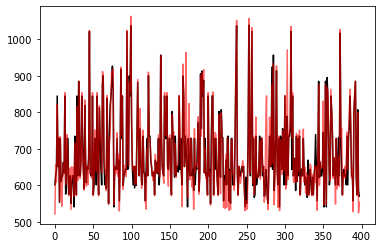

In [8]:
import matplotlib.pyplot as plt
def plot_predictions2(model, matix):
    #predictions = scaler_Y1.inverse_transform(model.predict(matix))
#     p_actuals= scaler_Y1.inverse_transform(matix.get_label())
    predictions=bst_Y1.predict(xgb.DMatrix(X_test[:,[0,1]],))
    p_actuals=Y1_test
    plt.plot(predictions,color='black')
    plt.plot(p_actuals,color='red',alpha=0.6)
    
    threshold = 0.1  # This means predictions within 10% of the actual values are considered accurate

    # Calculate the percentage difference and check if within threshold
    accurate_predictions = np.abs(np.array(predictions) - np.array(p_actuals)) <= threshold * np.abs(np.array(p_actuals))
    accuracy = np.mean(accurate_predictions) * 100  # Convert fraction of accurate predictions to percentage

    print(f'Prediction accuracy within a {threshold*100}% threshold: {accuracy:.2f}%')
    return 
plot_predictions2(bst_Y1, dtestY1)

In [54]:
predictions = bst_Y1.predict(dtestY1)
predictions

array([ 0.3566676 ,  0.3566676 , -0.48382533,  0.3566676 ,  0.3566676 ,
        0.3566676 , -0.08296684, -0.33210033,  0.3566676 , -0.14234908,
        0.3566676 , -0.07367002, -0.02166678, -0.07367002, -0.07367002,
       -0.04026749,  0.3566676 , -0.07367002, -0.07367002,  0.3566676 ,
        0.3566676 ,  0.03356842,  0.3566676 , -0.07367002, -0.07367002,
       -0.08296684, -0.33005312, -0.43000117, -0.23997933, -0.44941798,
       -0.07367002, -0.42770934, -0.04026749, -0.14234908,  0.3566676 ],
      dtype=float32)

In [10]:
def calculate_冷冻水流量(冷冻水泵频率, 冷冻水泵功率):
    value = bst_Y1.predict(xgb.DMatrix([[冷冻水泵频率,冷冻水泵功率]],))
    return value[0]

def calculate_冷却水流量(冷却水泵频率, 冷却水泵功率):
    value = bst_Y2.predict(xgb.DMatrix([[冷却水泵频率, 冷却水泵功率]],))
    return value[0]
# Assuming df is your DataFrame
# Define your conditions
condition = (
    
    ((df['运行模式'] == '冷机模式')&
    (df['冷机功率'] != 0)) &
    df['冷冻水泵频率'].notna() &
    df['冷冻水泵功率'].notna() &
    df['冷却水泵频率'].notna() &
    df['冷却水泵功率'].notna() &
    df['冷冻水流量'].isna()   &
    df['冷却水流量'].isna()
)

# Apply your custom calculation function only to rows that meet the condition
# Note: axis=1 specifies that the function should be applied to each row, not each column
df.loc[condition, '冷冻水流量'] = df[condition].apply(lambda row: calculate_冷冻水流量(row['冷冻水泵频率'], row['冷冻水泵功率']), axis=1)
df.loc[condition, '冷却水流量'] = df[condition].apply(lambda row: calculate_冷却水流量(row['冷却水泵频率'], row['冷却水泵功率']), axis=1)
output_path = '/Users/zhiranbai/Downloads/补充混合+板换+冷机水流量.xlsx'  # Update this to your desired output path
df.to_excel(output_path, index=False)